cykliczne warunki brzegowe

gęstość na całym układzie, nie na pojedynczej komórce

MCS = L = 100 (minimum)

ruch samochodów pokazujemy na macierzy, gdzie oś pionowa to MCS, a oś pozioma to rozmiar układu

kilka macierzy dla różnych p i rho, najlepiej na jednym subplocie 3x3

wykres prędkości od zagęszczenia

średnia prędkość po obu osiach, L=100 (minimum), dla 3 różnych p na jednym wykresie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import product

In [18]:
plt.rcParams['figure.dpi'] = 130

In [2]:
class Car:

    def __init__(self, v: int, pos: int):
        
        self.v = v
        self.pos = pos

    def move(self, N):

        self.pos = (self.pos + self.v) % N

In [9]:
class Traffic:

    def __init__(self, N: int, vmax: int, rho: float):

        self.N = N
        self.vmax = vmax
        self.rho = rho
        self.cars = self.initCars()
        self.positions = [car.pos for car in self.cars]
    
    def initCars(self):

        indices = list(range(self.N))
        positions = np.random.choice(indices, replace=False, size=int(self.rho*self.N))
        cars = [Car(self.vmax, pos) for pos in positions]

        return cars
    
    def adjustVelocities(self, p):

        unifs = np.random.uniform(size=len(self.cars))
        Ncars = len(self.cars)

        for i in range(Ncars):

            car = self.cars[i]

            if car.v < self.vmax:
                car.v += 1

            distance = (self.cars[(i+1) % Ncars].pos - car.pos) % self.N - 1

            if distance < car.v:
                car.v = distance

            if car.v >= 1 and unifs[i] < p:
                car.v -= 1

    def simulate(self, MCS, p):

        for _ in range(MCS):

            self.adjustVelocities(p)

            for i in range(len(self.cars)):
                car = self.cars[i]
                car.move(self.N)
                self.positions[i] = car.pos

    def display(self, MCS, p):

        steps = np.zeros((MCS, self.N))
        steps[0, self.positions] = 1

        for ts in range(1, MCS):

            self.adjustVelocities(p)

            for i in range(len(self.cars)):
                car = self.cars[i]
                car.move(self.N)
                self.positions[i] = car.pos

            steps[ts, self.positions] = 1

        return steps


In [16]:
rhos = [0.25, 0.5, 0.75]
ps = [0.25, 0.5, 0.75]
params = list(product(rhos, ps))
axes = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

Text(0.06, 0.5, 'L')

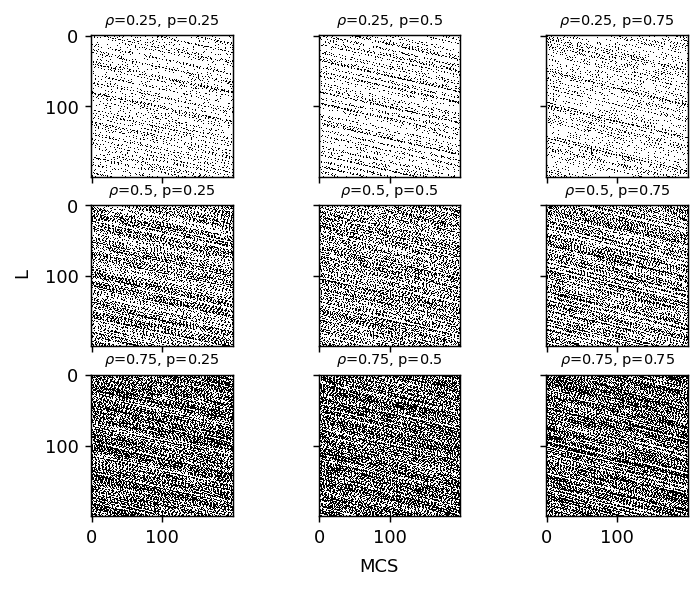

In [31]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
custom_cmap = ListedColormap(['white', 'black'])

for i, x in enumerate(axes):
    T = Traffic(200, 5, params[i][0])
    grid = T.display(200, params[i][1]) 
    axs[axes[i][0], axes[i][1]].imshow(grid, cmap=custom_cmap)
    axs[axes[i][0], axes[i][1]].set_title(rf'$\rho$={params[i][0]}, p={params[i][1]}', size=8)

fig.text(0.5, 0.02, 'MCS', ha='center')
fig.text(0.06, 0.5, 'L', va='center', rotation='vertical')
